In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from IPython.display import display

In [2]:
armistead_df = pd.read_csv("../data/Armistead; 1975 - 2017 eastern Bering Sea Crab Distribution For Web.csv")

In [3]:
noaa_df = pd.read_csv("../data/Detailed Crab Data From NOAA Fisheries Service Annual Eastern Bering Sea Summer Bottom Trawl Surveys 1975 - 2018.csv")

C:\Users\seanf\AppData\Local\Temp\ipykernel_12936\457969301.py:1: DtypeWarning: Columns (5,23) have mixed types. Specify dtype option on import or set low_memory=False.
  noaa_df = pd.read_csv("../data/Detailed Crab Data From NOAA Fisheries Service Annual Eastern Bering Sea Summer Bottom Trawl Surveys 1975 - 2018.csv")


In [4]:
# print(armistead_df.describe())

In [5]:
print("Unique species:", armistead_df['common_name'].nunique())

Unique species: 6


In [6]:
print(armistead_df['maturity_name'].value_counts())

maturity_name
Total male         30016
Sublegal           24910
Immature male      24146
Legal              23557
Mature male        21594
Total female       21221
Mature female      15994
Preferred          14095
Immature female    13905
Name: count, dtype: int64


In [7]:
print(armistead_df['survey_year'].value_counts().sort_index())

survey_year
1975    2768
1976    3402
1977    2997
1978    3564
1979    3187
1980    4039
1981    4102
1982    4645
1983    4244
1984    4282
1985    3609
1986    3944
1987    4512
1988    4951
1989    4600
1990    4885
1991    5202
1992    4737
1993    4545
1994    4243
1995    3980
1996    3959
1997    4194
1998    4402
1999    4476
2000    4464
2001    4442
2002    3980
2003    4024
2004    4137
2005    4158
2006    4957
2007    5110
2008    5537
2009    5366
2010    5406
2011    5258
2012    5371
2013    4954
2014    5078
2015    4746
2016    4486
2017    4495
Name: count, dtype: int64


In [8]:
armistead_df['year'] = armistead_df['survey_year']

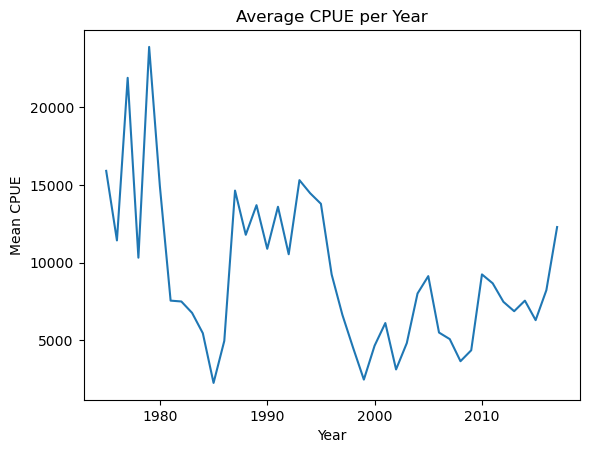

In [9]:
armistead_df.groupby('year')['cpue'].mean().plot(kind='line', title='Average CPUE per Year')
plt.xlabel('Year')
plt.ylabel('Mean CPUE')
plt.show()

In [10]:
print("Unique species codes:", noaa_df['species_code'].nunique())

Unique species codes: 17


In [11]:
print(noaa_df['sex'].value_counts())

sex
1    1435455
2     802527
3       3339
4        103
9          1
Name: count, dtype: int64


In [12]:
print(noaa_df['shell_condition'].value_counts())

shell_condition
2    1652001
3     366323
4     109191
1      83631
5      15447
9       8845
0       5985
6          2
Name: count, dtype: int64


In [13]:
noaa_df['year'] = noaa_df['cruise'].astype(str).str[:4].astype(int)

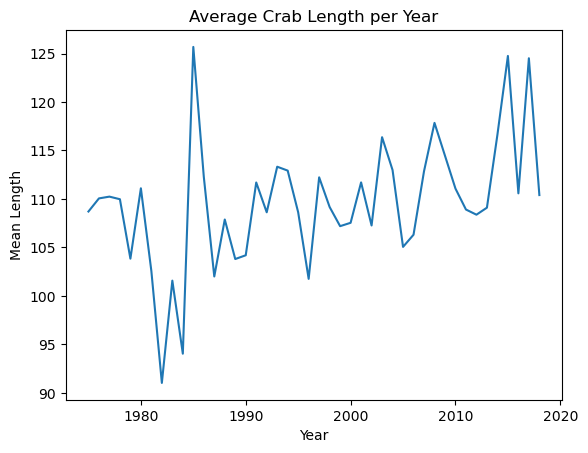

In [14]:
noaa_df.groupby('year')['length'].mean().plot(kind='line', title='Average Crab Length per Year')
plt.xlabel('Year')
plt.ylabel('Mean Length')
plt.show()

In [15]:
cpue_species_year = armistead_df.groupby(['survey_year', 'common_name'])['cpue'].mean().reset_index()

In [16]:
length_sex_year = noaa_df.groupby(['year', 'sex'])['length'].mean().reset_index()

In [17]:
arm_summary = armistead_df.groupby('year').agg({
    'cpue': 'mean',
    'bottom_temperature': 'mean',
    'surface_temperature': 'mean'}).reset_index()

In [18]:
noaa_df['has_disease'] = noaa_df['disease_code'].notna()
noaa_summary = noaa_df.groupby('year').agg({
    'has_disease': 'mean',   
    'length': 'mean',
    'weight': 'mean'}).reset_index()

In [19]:
summary = pd.merge(arm_summary, noaa_summary, on='year', how='inner')

In [20]:
#summary.to_csv("/DA14/Capstones/capstone-da14/data/crab_summary_by_year.csv", index=False)

In [21]:
disease_by_species_year = noaa_df.copy()
disease_by_species_year['year'] = noaa_df['cruise'].astype(str).str[:4].astype(int)
disease_by_species_year['has_disease'] = noaa_df['disease_code'].notna()

species_year_summary = (
    disease_by_species_year
    .groupby(['species_code', 'year'])
    .agg(disease_rate=('has_disease', 'mean'), sample_size=('has_disease', 'count'))
    .reset_index()
)

#species_year_summary.to_csv("/DA14/Capstones/capstone-da14/data/disease_by_species_year.csv", index=False)

In [44]:
disease_by_species_year.sort_values('year')

,crab_id,hauljoin,cruise,vessel,haul,station,species_kfrc,species_code,sex,length,...,chela_height,disease_code,disease_dorsal,disease_ventral,disease_legs,weight,comments,merus_length,year,has_disease
127181,116049,3440.0,197501,17,53,N25,7.0,68580,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975,False
84488,85077,3776.0,197501,19,4,S31,9.0,68590,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975,False
84487,85076,3776.0,197501,19,4,S31,9.0,68590,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975,False
84486,85075,3776.0,197501,19,4,S31,9.0,68590,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975,False
84485,85074,3776.0,197501,19,4,S31,9.0,68590,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209781,3212067,-17999.0,201801,94,184,S-23,7.0,68580,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,False
2209782,3212069,-17999.0,201801,94,184,S-23,7.0,68580,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,False
2209783,3212070,-17999.0,201801,94,184,S-23,7.0,68580,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,False
2209774,3212058,-17999.0,201801,94,184,S-23,7.0,68580,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018,False


In [22]:
armistead_df['depth_band'] = pd.cut(armistead_df['bottom_depth'], bins=[0, 50, 100, 150, 200, 300], labels=["0-50", "50-100", "100-150", "150-200", "200+"])

env_by_depth = (
    armistead_df
    .groupby(['year', 'depth_band'])
    .agg(
        mean_cpue=('cpue', 'mean'),
        bottom_temp=('bottom_temperature', 'mean'),
        surface_temp=('surface_temperature', 'mean'),
        n_samples=('cpue', 'count')
    )
    .reset_index()
)

#env_by_depth.to_csv("/DA14/Capstones/capstone-da14/data/env_by_depth_band.csv", index=False)

C:\Users\seanf\AppData\Local\Temp\ipykernel_12936\209142607.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'depth_band'])


In [23]:
vessel_summary = (
    armistead_df
    .groupby(['vessel'])
    .agg(
        avg_cpue=('cpue', 'mean'),
        avg_bottom_temp=('bottom_temperature', 'mean'),
        avg_depth=('bottom_depth', 'mean'),
        total_hauls=('haul', 'count')
    )
    .reset_index()
)

vessel_summary.to_csv("/DA14/Capstones/capstone-da14/data/vessel_summary.csv", index=False)

In [24]:
species_lookup = armistead_df[['vessel', 'cruise', 'haul', 'common_name', 'scientific_name']].drop_duplicates()

In [25]:
noaa_with_species_names = pd.merge(
    noaa_df,
    species_lookup,
    on=['vessel', 'cruise', 'haul'],
    how='left')

In [26]:
noaa_with_species_names[['species_code', 'common_name', 'scientific_name']].drop_duplicates().sort_values('species_code').head(10)

,species_code,common_name,scientific_name
3313616,68020,hybrid Tanner crab,Chionoecetes hybrid
3313613,68020,red king crab,Paralithodes camtschaticus
3313615,68020,snow crab,Chionoecetes opilio
3348402,68020,NaN,NaN
3313617,68020,hair crab,Erimacrus isenbeckii
3313614,68020,southern Tanner crab,Chionoecetes bairdi
4592209,68550,NaN,NaN
25528,68560,hybrid Tanner crab,Chionoecetes hybrid
1689,68560,blue king crab,Paralithodes platypus
1688,68560,red king crab,Paralithodes camtschaticus


In [27]:
species_lookup_clean = (
    noaa_with_species_names[
        ['species_code', 'common_name', 'scientific_name']
    ]
    .dropna(subset=['common_name', 'scientific_name'])
    .drop_duplicates()
    .sort_values('species_code')
)

species_lookup_clean.to_csv("/DA14/Capstones/capstone-da14/data/species_code_lookup.csv", index=False)

In [28]:
missing_names = noaa_with_species_names[
    noaa_with_species_names['common_name'].isna()
]['species_code'].value_counts().head(10)

In [29]:
missing_names

species_code
68580    242829
68560    116929
69322     70115
68590     21793
68570     14511
68550      6609
69323      3666
69310      2803
69400      2028
68781      1139
Name: count, dtype: int64

In [30]:
species_lookup_clean = pd.DataFrame({
    'species_code': [68020, 68560, 68550, 68570, 68590],
    'common_name': ['hybrid Tanner crab', 'hybrid Tanner crab', 'red king crab', 'blue king crab', 'hair crab'],
    'scientific_name': ['Chionoecetes hybrid', 'Chionoecetes hybrid', 'Paralithodes camtschaticus', 'Paralithodes platypus', 'Erimacrus isenbeckii']
})

manual_species_map = {
    68580: ("snow crab", "Chionoecetes opilio"),
    69322: ("Bering hermit crab", "Pagurus beringanus"),
    69323: ("hermit crab sp.", "Paguridae sp."),
    69310: ("hermit crab sp.", "Paguridae sp."),
    69400: ("unidentified crab sp.", "Brachyura indet."),
    68781: ("juvenile crab sp.", "Unknown")
}

manual_species_df = pd.DataFrame.from_dict(
    manual_species_map, orient='index', columns=['common_name', 'scientific_name']
).reset_index().rename(columns={'index': 'species_code'})

species_lookup_final = pd.concat([species_lookup_clean, manual_species_df], ignore_index=True)
species_lookup_final = species_lookup_final.drop_duplicates(subset='species_code').reset_index(drop=True)


species_lookup_final.to_csv("/DA14/Capstones/capstone-da14/data/species_code_lookup.csv", index=False)

species_lookup_final

,species_code,common_name,scientific_name
0,68020,hybrid Tanner crab,Chionoecetes hybrid
1,68560,hybrid Tanner crab,Chionoecetes hybrid
2,68550,red king crab,Paralithodes camtschaticus
3,68570,blue king crab,Paralithodes platypus
4,68590,hair crab,Erimacrus isenbeckii
5,68580,snow crab,Chionoecetes opilio
6,69322,Bering hermit crab,Pagurus beringanus
7,69323,hermit crab sp.,Paguridae sp.
8,69310,hermit crab sp.,Paguridae sp.
9,69400,unidentified crab sp.,Brachyura indet.


In [31]:
noaa_df = noaa_df.merge(
    species_lookup_final[['species_code', 'common_name']],
    on='species_code',
    how='left')

print(noaa_df[['species_code', 'common_name']].head(10))

   species_code            common_name
0         69400  unidentified crab sp.
1         69400  unidentified crab sp.
2         69400  unidentified crab sp.
3         68580              snow crab
4         68580              snow crab
5         68580              snow crab
6         68580              snow crab
7         68580              snow crab
8         68580              snow crab
9         68580              snow crab


In [32]:
missing_common = noaa_df[noaa_df['common_name'].isna()]

In [33]:
noaa_df = noaa_df.merge(
    species_lookup_final[['species_code', 'scientific_name']],
    on='species_code',
    how='left')

In [34]:
#missing_sci = noaa_df[noaa_df['scientific_name'].isna()]

In [35]:
noaa_df['common_name'] = noaa_df['common_name'].fillna('Unknown')
noaa_df['scientific_name'] = noaa_df['scientific_name'].fillna('Unknown')

In [36]:
armistead_df['common_name'].value_counts()

common_name
snow crab               76678
southern Tanner crab    63414
red king crab           21622
hybrid Tanner crab      14737
blue king crab           7786
hair crab                5201
Name: count, dtype: int64

In [37]:
armistead_coords = armistead_df[['vessel', 'cruise', 'haul', 'latitude', 'longitude']].drop_duplicates()

noaa_df = noaa_df.merge(armistead_coords, on=['vessel', 'cruise', 'haul'], how='left')

In [38]:
armistead_df = armistead_df.rename(columns={'station_id': 'station'})

In [39]:
coords = armistead_df[['vessel', 'cruise', 'haul', 'station', 'latitude', 'longitude']].drop_duplicates()

In [40]:
noaa_df = noaa_df.merge(coords, on=['vessel', 'cruise', 'haul', 'station'], how='left')

In [41]:
#noaa_df.to_csv('/DA14/Capstones/capstone-da14/data/noaa_cleaned.csv', index=False)

In [42]:
#armistead_df.to_csv('/DA14/Capstones/capstone-da14/data/armistead_cleaned.csv', index=False)